In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading Dataset
df=pd.read_csv("Diwali_Sales_Data.csv",encoding='unicode_escape')

In [3]:
# Basic Info
print("Shape of The Dataset:- ",df.shape)
print("First Five Rows of The Dataset:-",df.head())
print("\nDataset Info:\n")
print(df.info())
print("\nMissing Values:\n",df.isnull().sum())

Shape of The Dataset:-  (11251, 15)
First Five Rows of The Dataset:-    User_ID  Cust_name Product_ID Gender Age Group  Age  Marital_Status  \
0  1002903  Sanskriti  P00125942      F     26-35   28               0   
1  1000732     Kartik  P00110942      F     26-35   35               1   
2  1001990      Bindu  P00118542      F     26-35   35               1   
3  1001425     Sudevi  P00237842      M      0-17   16               0   
4  1000588       Joni  P00057942      M     26-35   28               1   

            State      Zone       Occupation Product_Category  Orders  \
0     Maharashtra   Western       Healthcare             Auto       1   
1  Andhra Pradesh  Southern             Govt             Auto       3   
2   Uttar Pradesh   Central       Automobile             Auto       3   
3       Karnataka  Southern     Construction             Auto       2   
4         Gujarat   Western  Food Processing             Auto       2   

    Amount  Status  unnamed1  
0  23952.0     N

In [4]:
# Data Cleaning 

# drop unneccessary columns
df.drop(['Status','unnamed1'],axis=1,inplace=True)

# drop missing values
df.dropna(inplace=True)

# Convert Amount column to interger
df['Amount']=df['Amount'].astype(int)

# Shape of Dataset 
print("Shape of Dataset After Cleaning",df.shape)
print(df.info())

Shape of Dataset After Cleaning (11239, 13)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  int64 
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Marital_Status    11239 non-null  int64 
 7   State             11239 non-null  object
 8   Zone              11239 non-null  object
 9   Occupation        11239 non-null  object
 10  Product_Category  11239 non-null  object
 11  Orders            11239 non-null  int64 
 12  Amount            11239 non-null  int32 
dtypes: int32(1), int64(4), object(8)
memory usage: 1.2+ MB
None


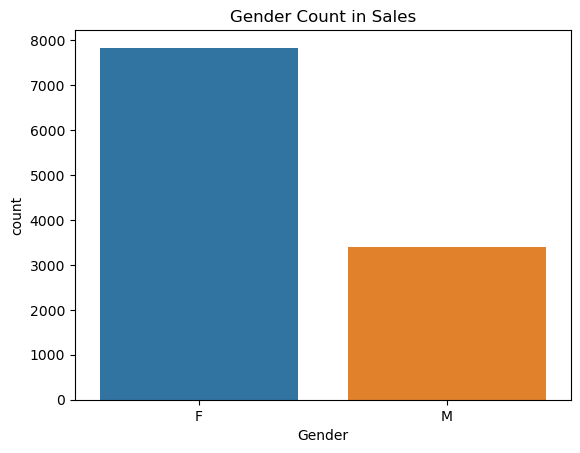

In [5]:
#Exploratory Data Analysis

# Step 1- Gender wise Sales Analysis

# Gender Count
gc=sns.countplot(x='Gender',data=df)
plt.title("Gender Count in Sales")
plt.show()



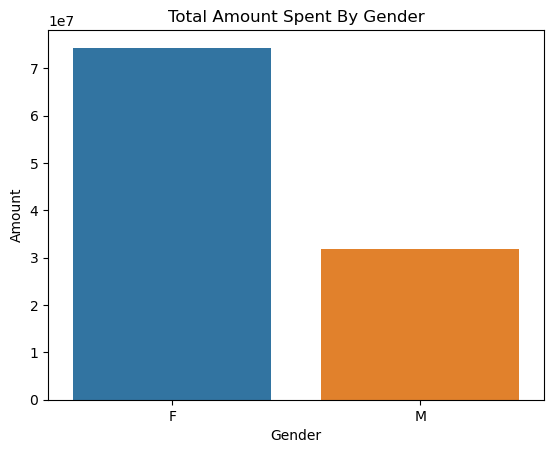

In [6]:
# Gender vs Amount
sales_by_gender=df.groupby('Gender')['Amount'].sum().reset_index()

gc=sns.barplot(x='Gender',y='Amount',data=sales_by_gender)
plt.title("Total Amount Spent By Gender")
plt.show()

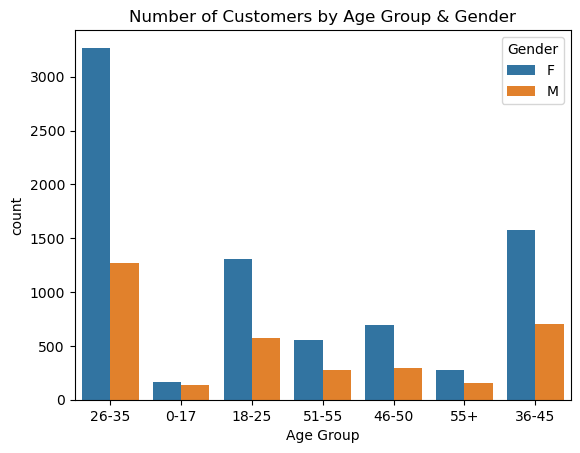

In [7]:
# Step 2- Age Group wise Sales

# Age Group Count 
ag=sns.countplot(x='Age Group',data=df,hue='Gender')
plt.title("Number of Customers by Age Group & Gender")
plt.show()

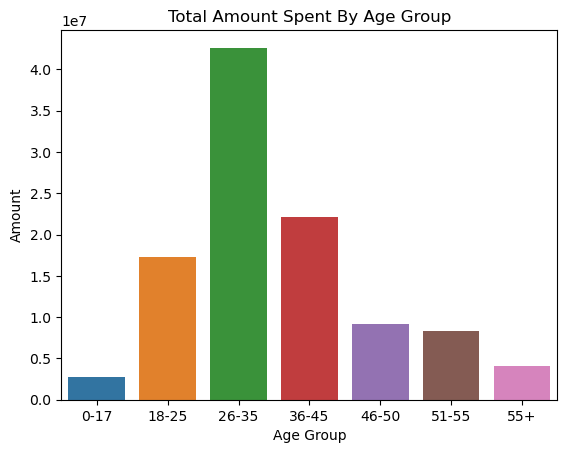

In [8]:
# Age Group vs Amount

sales_by_age=df.groupby('Age Group')['Amount'].sum().reset_index()
agm=sns.barplot(x='Age Group',y='Amount',data=sales_by_age,hue=None)
plt.title("Total Amount Spent By Age Group")
plt.show()


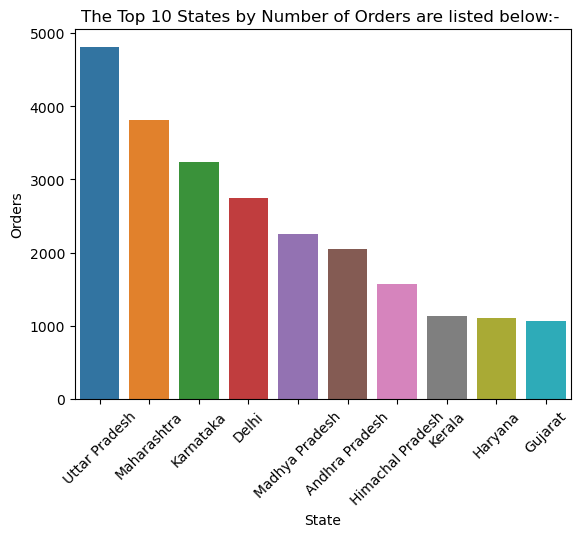

In [9]:
# Step 3- State wise sales

# Top 10 Sales by Orders
orders_by_state=df.groupby('State')['Orders'].sum().sort_values(ascending=False).head(10).reset_index()

sws=sns.barplot(x='State',y='Orders',data=orders_by_state)
plt.title("The Top 10 States by Number of Orders are listed below:- ")
plt.xticks(rotation=45)
plt.show()

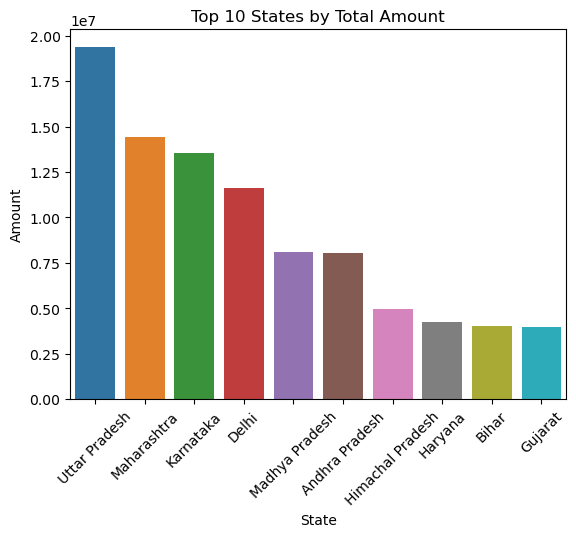

In [10]:
# Top 10 States by Amount
sales_by_state=df.groupby('State')['Amount'].sum().sort_values(ascending=False).head(10).reset_index()
sba=sns.barplot(x='State',y='Amount',data=sales_by_state)
plt.title("Top 10 States by Total Amount")
plt.xticks(rotation=45)
plt.show()

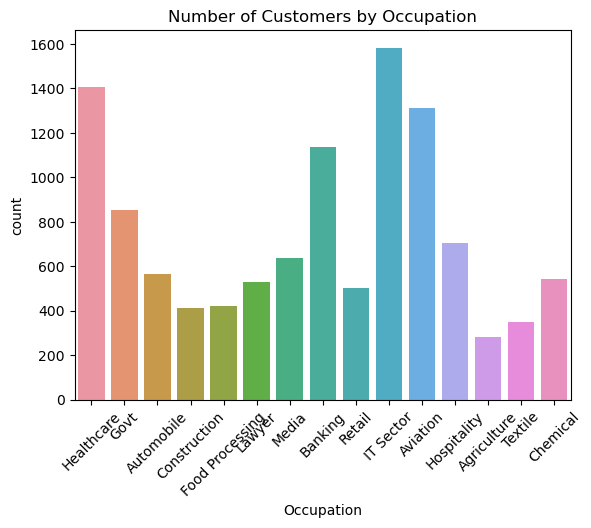

In [11]:
# Step 4- Occupation Wise Sales

# Occupation Count
oc=sns.countplot(x='Occupation',data=df)
plt.title("Number of Customers by Occupation")
plt.xticks(rotation=45)
plt.show()


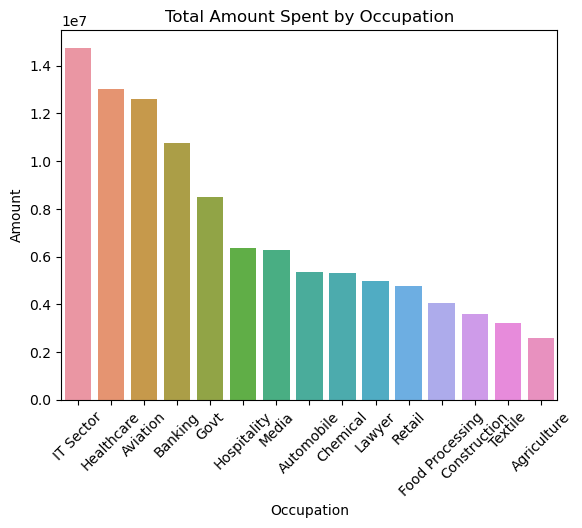

In [12]:
# Occupation vs Amount
sales_by_occ=df.groupby('Occupation')['Amount'].sum().sort_values(ascending=False).reset_index()
ova=sns.barplot(x='Occupation',y='Amount',data=sales_by_occ)
plt.title("Total Amount Spent by Occupation")
plt.xticks(rotation=45)
plt.show()

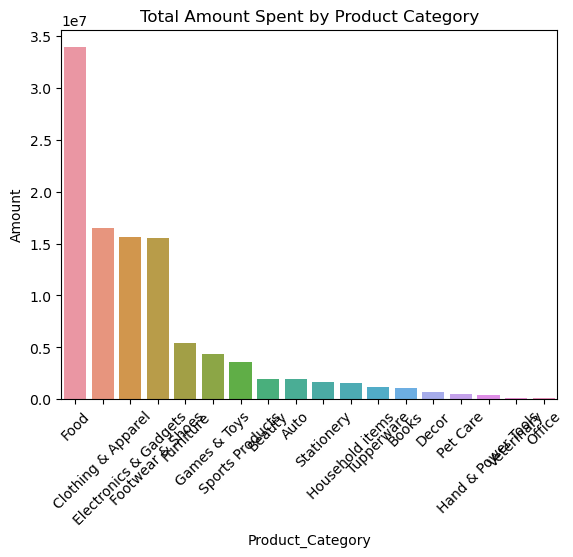

In [13]:
# Product Category vs Amount 
sales_by_cat=df.groupby('Product_Category')['Amount'].sum().sort_values(ascending=False).reset_index()

pca=sns.barplot(x='Product_Category',y='Amount',data=sales_by_cat)
plt.title("Total Amount Spent by Product Category")
plt.xticks(rotation=45)
plt.show()

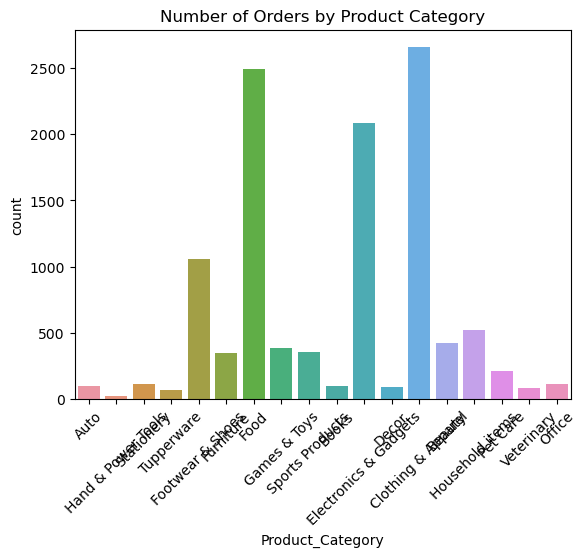

In [14]:
# Step 5- Product Category-wise Sales

# Product Category Count
pcc=sns.countplot(x='Product_Category',data=df)
plt.title("Number of Orders by Product Category")
plt.xticks(rotation=45)
plt.show()



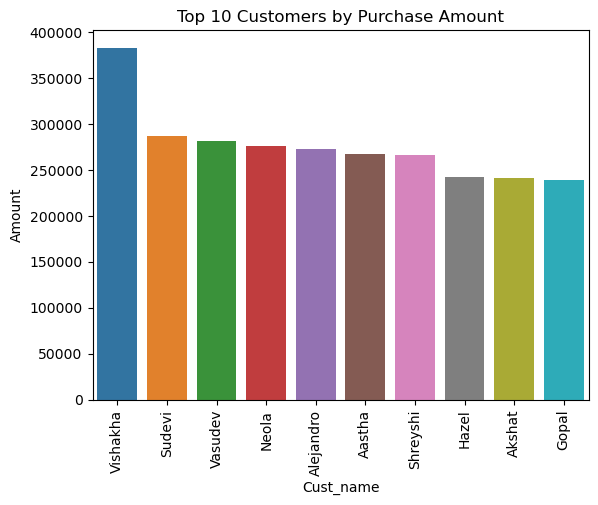

In [15]:
# Step 6- Top Customers by Purchase

# Top 10 Customers by Amount
top_customers=df.groupby('Cust_name')['Amount'].sum().sort_values(ascending=False).head(10).reset_index()

cba=sns.barplot(x='Cust_name',y='Amount',data=top_customers)
plt.title("Top 10 Customers by Purchase Amount")
plt.xticks(rotation=90)
plt.show()

### Business Insights From Diwali Sales Data

Female Customers is purchasing more items then Male Customers
Female Customers> Male Customers

Age Group 26-35 is higheset spending 

The Top 3 States is 
1. Uttar Pradesh
2. Maharashtra 
& 
3. Karnaktaka

Top Occupations:
1. IT
2. Healthcare
3. Aviation

Top Categories 
1. Food
2. Clothing
3. Electronics